In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [127]:
df.shape

(7043, 21)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Data Cleaning

In [129]:
columns = df.columns

for col in columns:
    print(f"{col} has {df[col].unique()}")

customerID has ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender has ['Female' 'Male']
SeniorCitizen has [0 1]
Partner has ['Yes' 'No']
Dependents has ['No' 'Yes']
tenure has [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService has ['No' 'Yes']
MultipleLines has ['No phone service' 'No' 'Yes']
InternetService has ['DSL' 'Fiber optic' 'No']
OnlineSecurity has ['No' 'Yes' 'No internet service']
OnlineBackup has ['Yes' 'No' 'No internet service']
DeviceProtection has ['No' 'Yes' 'No internet service']
TechSupport has ['No' 'Yes' 'No internet service']
StreamingTV has ['No' 'Yes' 'No internet service']
StreamingMovies has ['No' 'Yes' 'No internet service']
Contract has ['Month-to-month' 'One year' 'Two year']
PaperlessBilling has ['Yes' 'No']
PaymentMethod has ['Elect

In [130]:
# droping customerID column
df.drop(['customerID'], axis=1, inplace=True)

In [131]:

df['TotalCharges'] = pd.to_numeric(df.TotalCharges , errors='coerce')

In [132]:
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,-0.001874,0.016479,-0.211185,0.008576,-0.008576,...,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,0.005106,0.379697,0.159712,0.008448,-0.008448,...,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,-0.014569,0.096848,-0.113890,0.247398,-0.247398,...,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,-0.000080,0.317504,0.062078,0.113214,-0.113214,...,-0.375223,0.514973,-0.375223,0.520122,0.170814,0.354481,0.158574,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,-0.008612,-0.150448,-0.164221,0.011942,-0.011942,...,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-0.008612,1.000000,-0.001808,0.010517,-0.006488,0.006488,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.016479,0.379697,0.096848,0.317504,-0.150448,-0.001808,1.000000,0.452676,0.017706,-0.017706,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.211185,0.159712,-0.113890,0.062078,-0.164221,0.010517,0.452676,1.000000,-0.001762,0.001762,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008576,0.008448,0.247398,0.113214,0.011942,-0.006488,0.017706,-0.001762,1.000000,-1.000000,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.113214,-0.011942,0.006488,-0.017706,0.001762,-1.000000,1.000000,...,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [134]:
# checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [135]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [136]:
df[df['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

To solve the problem of missing values in TotalCharges column, I decided to fill it with Zero as they are new customers and haven been billed yet

In [137]:
df['TotalCharges'].fillna(0, inplace=True)

In [138]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [139]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [140]:
# Defining categorical and numerical columns
categorical_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"
]
numerical_cols = ["tenure", "MonthlyCharges", 'TotalCharges']


In [141]:
# Mapping the target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

## EDA

Demographics Analysis

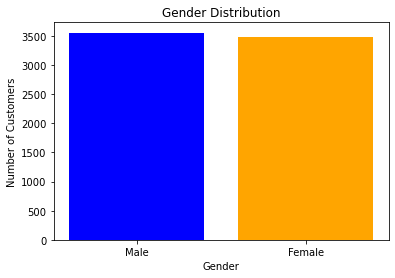

In [142]:
# Gender Distribution
gender_counts = df["gender"].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

The dataset is evenly split between male and female customers.

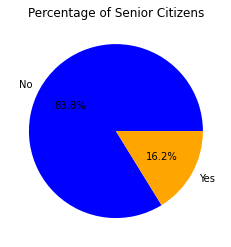

In [144]:
# Senior Citizens Distribution
senior_counts = df['SeniorCitizen'].value_counts()
plt.pie(senior_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Percentage of Senior Citizens')
plt.show()

Only 16% of customers are senior citizens.

Customer Account Information

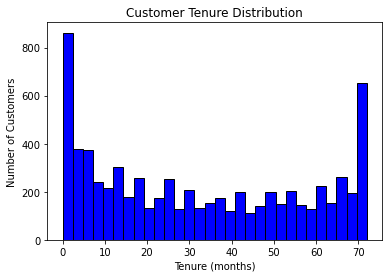

In [146]:
# Tenure Distribution
plt.hist(df['tenure'], bins=30, color='blue', edgecolor='black')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

Many customers have a short tenure (1-2 months), while others stay for up to 72 months.

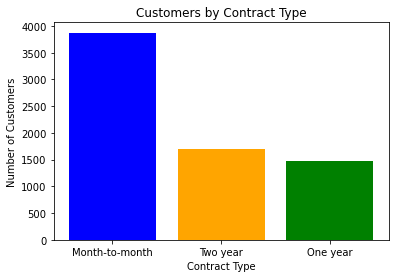

In [147]:
# Contract Type Distribution
contract_counts = df['Contract'].value_counts()
plt.bar(contract_counts.index, contract_counts.values, color=['blue', 'orange', 'green'])
plt.title('Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

Most customers are on month-to-month contracts.

Churn Analysis

In [80]:
# Overall churn rate
churn_rate = df['Churn'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")


Overall Churn Rate: 26.54%


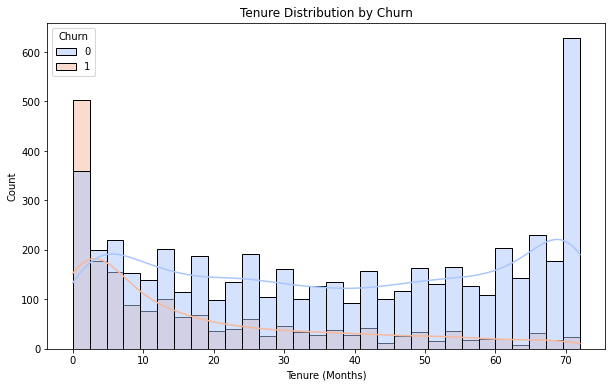

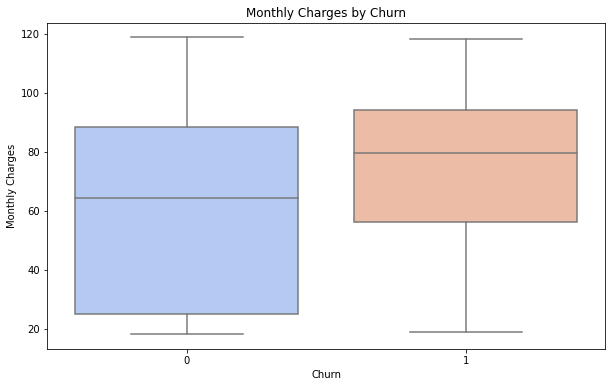

In [81]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='coolwarm')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

# MonthlyCharges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

          tenure     Churn
tenure  1.000000 -0.352229
Churn  -0.352229  1.000000


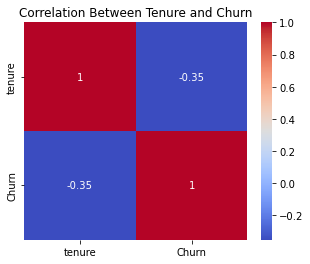

In [83]:
# Check correlation of tenure with churn
correlation = df[['tenure', 'Churn']].corr()
print(correlation)

# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Tenure and Churn")
plt.show()


Negative correlation → Longer tenure = lower churn.

In [150]:
# One-Hot Encoding categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [151]:
# Scaling numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [85]:
df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.172165,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.193672,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.938874,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Logestic Regression

Logistic Regression Model Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



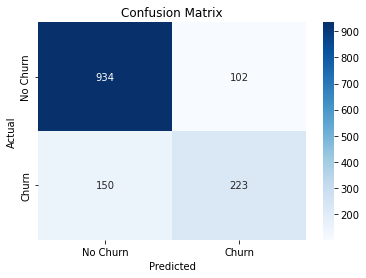

In [152]:
# Split data into train and test sets
X_log = df.drop(columns=["Churn"])
y_log = df["Churn"]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Build and train model
model_log = LogisticRegression()
model_log.fit(X_train_log, y_train_log)

# Predictions
y_pred_log = model.predict(X_test_log)

# Evaluate the model
accuracy_log = accuracy_score(y_test_log, y_pred_log)
print(f"Logistic Regression Model Accuracy: {accuracy_log:.2f}")

print("Classification Report:")
print(classification_report(y_test_log, y_pred_log))

cm_log = confusion_matrix(y_test_log, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Random Forest

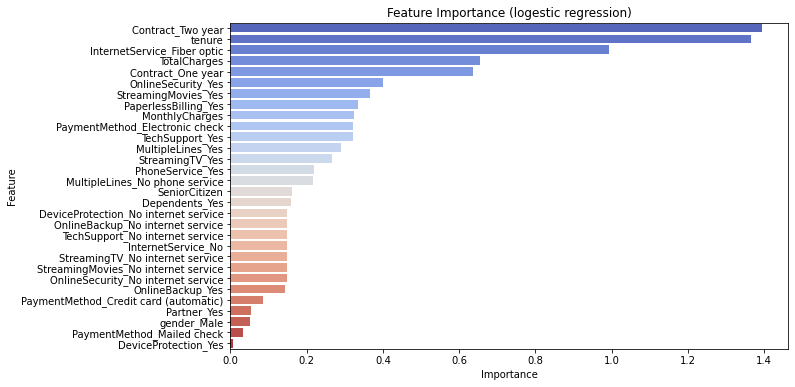

Top 5 Features by Importance:
                        Feature  Importance
25            Contract_Two year    1.394233
1                        tenure    1.365410
10  InternetService_Fiber optic    0.992734
3                  TotalCharges    0.654944
24            Contract_One year    0.637453


In [153]:
# feature importance
feature_importance = pd.DataFrame({
    'Feature': X_log.columns,
    'Importance': np.abs(model_log.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance (logestic regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# top 5 features
print("Top 5 Features by Importance:")
print(feature_importance.head(5))

Random Forest Classifier Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



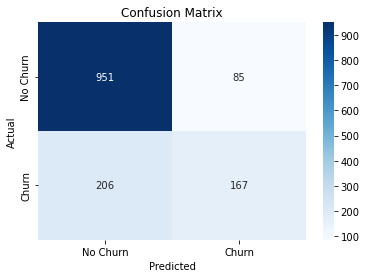

In [154]:
# Split data into train and test sets
X_rf = df.drop(columns=["Churn"])
y_rf = df["Churn"]
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_classifier.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

print("Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [91]:
# hyperparameter grid
param_grid = {
    'n_estimators': [100,300, 500],
    'max_depth': [None,10,20, 30]
}
# initating GridSearch
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rf, y_train_rf)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 300}


rf_classifier_fine_tuned Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1036
           1       0.58      0.77      0.66       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.82      0.79      0.80      1409



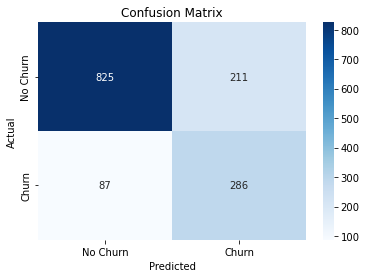

In [155]:
# Initialize the Random Forest Classifier
rf_classifier_fine_tuned = RandomForestClassifier(n_estimators=300, class_weight='balanced',max_depth=10, random_state=42)

# Train the model
rf_classifier_fine_tuned.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_tuned_rf = rf_classifier_fine_tuned.predict(X_test_rf)

# Evaluate the model
accuracy_tuned_rf = accuracy_score(y_test_rf, y_pred_tuned)
print(f"rf_classifier_fine_tuned Accuracy: {accuracy_tuned_rf:.2f}")

print("Classification Report:")
print(classification_report(y_test_rf, y_pred_tuned_rf))

cm_tuned_rf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned_rf , annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [156]:
# Define hyperparameter grid
param_distributions = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Utilize all available cores
    random_state=42  # For reproducibility
)

# Fit the model
random_search.fit(X_train_rf, y_train_rf)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}


Accuracy with Best Parameters: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



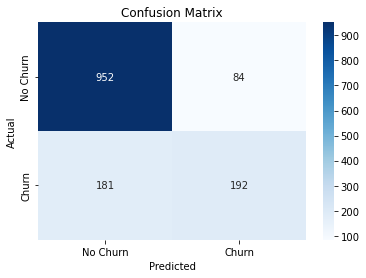

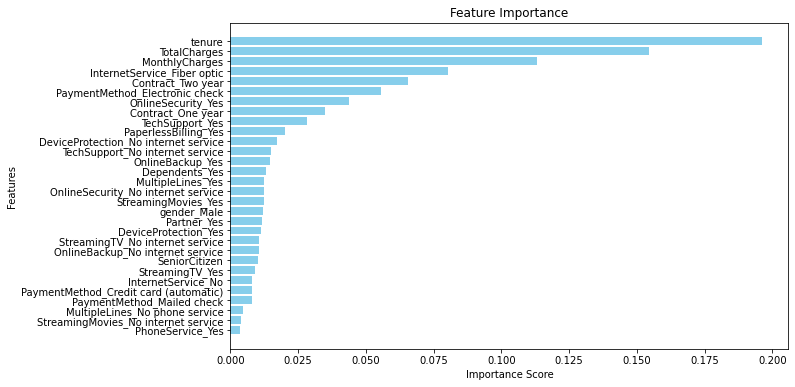

In [157]:
# Initialize the Random Forest Classifier with best parameters
rf_classifier_best = RandomForestClassifier(
    n_estimators=100,         # Best value for n_estimators
    max_depth=10,             # Best value for max_depth
    min_samples_split=2,      # Best value for min_samples_split
    min_samples_leaf=4,       # Best value for min_samples_leaf
    bootstrap=True,           # Best value for bootstrap
    random_state=42
)

# Train the model
rf_classifier_best.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_best_rf = rf_classifier_best.predict(X_test_rf)

# Evaluate the model's accuracy
accuracy_best_rf = accuracy_score(y_test_rf, y_pred_best_rf)
print(f"Accuracy with Best Parameters: {accuracy_best_rf:.2f}")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_best_rf))

# Confusion Matrix
cm_best_rf = confusion_matrix(y_test_rf, y_pred_best_rf)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_best_rf, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=["No Churn", "Churn"], 
    yticklabels=["No Churn", "Churn"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize Feature Importances
feature_importance = rf_classifier_best.feature_importances_
feature_names = X_train_rf.columns  # Assuming X_train_rf is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
